# Laufzeituntersuchung

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import time

## Durchführung

Durchführung des DBscans für $ 100\cdot 2^i,\ i \in [0,9]\cap \mathbb{N}$ zufällig erzeugte Knoten im Graphen

In [3]:
time_values=[]
for i in range(5):#10
    X, y = make_blobs(n_samples=100*(2**(i+5)), centers=4,
                   random_state=42)#, cluster.std=0.7)



    #print(X.shape)
    start = time.time()
    #plt.show()
    clustering = DBSCAN(eps=3, min_samples=2).fit(X)
    #print(clustering.labels_)
    end = time.time()
    elapsed=end-start
    time_values.append(elapsed)
time_values_normalised=[]
problemsize=[]
for i in range(5):#10
    time_values_normalised.append(time_values[i]/time_values[0])
    problemsize.append(100*(2**i))
    #plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
    #xsquar.append(2**(2*i))
print("Problemgröße:")
print(problemsize)
print("Berechnungszeiten")
print(time_values)
print("Berechnungszeiten normalisiert auf kleinste Problemgröße")
print(time_values_normalised)

Problemgröße:
[100, 200, 400, 800, 1600]
Berechnungszeiten
[0.08148646354675293, 0.09968209266662598, 0.31907081604003906, 1.0020184516906738, 4.4598588943481445]
Berechnungszeiten normalisiert auf kleinste Problemgröße
[1.0, 1.2232963406177677, 3.9156296905310155, 12.296747313322351, 54.731285421281]


In [4]:
log_time_values_normalised=[]
log_time_values_normalised=np.log2(time_values_normalised)
#print(log_time_values_normalised)

## Laufzeitunterschiede mit Vergrößerung der Problemgröße

Sei $t_j$ die Laufzeit zur Problemgröße $j$. 
Wir berechnen: $\frac{t_{j+1}}{t_j}$

In [6]:
changes=[]
for i in range(4):
    changes.append(time_values[i+1]/time_values[i])
print(changes)

[1.2232963406177677, 3.20088400538631, 3.1404265176196313, 4.4508750181427965]


## Plotten der Resultate

Text(0, 0.5, 'log_2(Ausführzeit_normalized)')

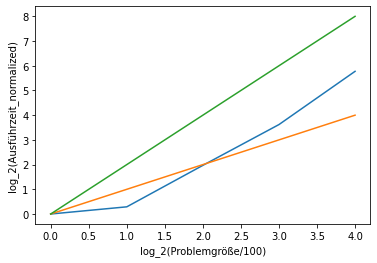

In [7]:
plt.plot(log_time_values_normalised)
plt.plot(range(5))#10
plt.plot(range(0,10,2))#0,20,2
plt.xlabel("log_2(Problemgröße/100)")
plt.ylabel("log_2(Ausführzeit_normalized)")
#plt.axis([0, 20, 0 , 40])
#plt.plot(range(10))

## Zusammenhänge

Let assume that the Runtime $t$ increase to the Problemsize $n$ linear. ($t(n)=a*n$) If we increase the Problemsize by power to 2, then the Runtime should also increase by a power of 2. $i=2^n,\ t(i)=a*i=a*2^n$.
If we take the $\log_2$ to this function we get $\log_2(a*2^n)=\log_2(a)+\log_2(2^n)\log_a(a)+n$.

Let assume that the Runtime $t$ increase to the Problemsize $n$ quatratic. $t(n)=a*n^2$. If we increase that Problemsize by power to 2, the Runtime increase now fast. Problem $i=2^n$, $t(i)=a*i^2=a*2^2n$.
If we take now the log to this function we get: $\log_2(t(i))=\log_2(a)+\log_2(2^2n)=\log_2(a)+2n$

So if we have a linear runtime, we would get in the log log Graph a linear function($lt(x)=ax+b$) with a=1, if we have a quadratic runtim we would get a linear funciton ($lt(x)=ax+b$) with a=2

In the graph, the blue line ist our Runtime Data from DBSCAN, the organge line is a linear function with $y=x$, the green line a linear function with $y=2x$. With small Problemsize, the log log Runtime grows as fast as $y=x$, but for bigger Problemsize, it grows as fast as $y=2x$. I would assume, that these Results come to some overhead with smal Problemsize and so i would assume a qudratic Runtime behavior.